In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks/Data Mining")

In [3]:
from google.colab import files
files.upload()

Saving all_imports.py to all_imports (2).py


{'all_imports.py': b'import numpy as np \r\nimport pandas as pd \r\nimport seaborn as sns\r\nimport matplotlib.pyplot as plt\r\n# to change default colormap\r\nplt.rcParams["image.cmap"] = "Set1"\r\n# to change default color cycle\r\nplt.rcParams[\'axes.prop_cycle\'] = plt.cycler(color=plt.cm.Set1.colors)\r\nimport warnings\r\nwarnings.filterwarnings(\'ignore\')\r\nfrom pdb import set_trace\r\n# t-SNE visualization\r\nfrom sklearn.manifold import TSNE\r\n\r\n# imputation\r\nfrom sklearn.impute import KNNImputer\r\n\r\n\r\nimport matplotlib.pyplot as plt\r\nfrom matplotlib.ticker import MaxNLocator\r\nfrom sklearn.decomposition import PCA\r\n\r\n# Scaling\r\nfrom sklearn.preprocessing import StandardScaler\r\n\r\n# PCA\r\nfrom sklearn.decomposition import PCA\r\n\r\n# K-means for Clustering\r\nfrom sklearn.cluster import KMeans\r\nfrom yellowbrick.datasets import load_nfl\r\nfrom sklearn.cluster import MiniBatchKMeans\r\nfrom yellowbrick.cluster import intercluster_distance\r\n\r\nfrom 

In [4]:
from google.colab import files
files.upload()

Saving adspy_shared_utilities.py to adspy_shared_utilities (1).py


{'adspy_shared_utilities.py': b'import numpy\r\nimport pandas as pd\r\nimport seaborn as sn\r\nimport matplotlib.pyplot as plt\r\nimport matplotlib.cm as cm\r\nfrom matplotlib.colors import ListedColormap, BoundaryNorm\r\nfrom sklearn import neighbors\r\nimport matplotlib.patches as mpatches\r\nimport graphviz\r\nfrom sklearn.tree import export_graphviz\r\nimport matplotlib.patches as mpatches\r\n\r\ndef load_crime_dataset():\r\n    # Communities and Crime dataset for regression\r\n    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized\r\n\r\n    crime = pd.read_table(\'readonly/CommViolPredUnnormalizedData.txt\', sep=\',\', na_values=\'?\')\r\n    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column\r\n    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  \r\n    crime = crime.ix[:,columns_to_keep].dropna()\r\n\r\n    X_crime = crime.ix[:,range(0,88)]\r\n    y_crime = crime[\'ViolentCr

In [33]:

%matplotlib inline
from all_imports import * 
from adspy_shared_utilities import *
from scipy.stats import norm
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from scipy import stats
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statistics import mean

# Load Data

In [26]:
 def load_data():
   df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/static/online_shoppers_intention.csv')
   return df
df =load_data()

# Part I:  Data Visualization - Insights

---



In [80]:
def data_visualizations():
  # Show revenue 
  df= load_data()
  fig, axs = plt.subplots(figsize=(10,4))
  plt.title('User purcharses in website', fontsize = 15)
  g = sns.countplot(x='Revenue', data=df, ax=axs)
  print('Skewness: %f' % df['Revenue'].skew())
  print('Kurtosis: %f' % df['Revenue'].kurt())
 
  plt.subplots(figsize=(7, 3))

  sns.countplot(data = df,
                x ='Month',hue = 'Revenue',
                palette="pastel").set_title('Sales ratio per Month')

  plt.subplots(figsize=(7, 3))

  sns.countplot(data = df, 
                x ='Weekend',
                hue = 'Revenue',
              palette = "pastel").set_title('Sales ratio on Weekdays(Weekends)')


  ax = plt.subplots(figsize=(10, 3))
  #Bounce Rates by region
  df_region = df[['BounceRates','Region']]
  df_region.groupby("Region").sum().plot(kind="bar")
  plt.subplots(figsize=(7, 3))
  df2 = df[df['SpecialDay']!=0]
  sns.countplot(data = df2,
                x ='SpecialDay',
                hue = 'Revenue',
              palette = "pastel").set_title('RevenueSpecial Days')

  sns.countplot(data = df,
              x ='TrafficType',
              hue = 'Region',
              palette="pastel").set_title('Traffic volume by Region per Traffic Type')

  sns.countplot(data = df,
              x ='Month',
              hue = 'VisitorType',
        
             palette = "pastel").set_title('Visitor Type per Month')



 
  sns.countplot(data = df,
              x ='OperatingSystems',
              hue = 'VisitorType',
            palette = "pastel").set_title('Visitor Type per Operating System')
              #correlation matrix
  sns.set(font_scale = 1)
  plt.figure(figsize=(20,10))
  heatmap = sns.heatmap(df.corr(),cmap=sns.diverging_palette(20, 220, n=200),center = 0,annot=True)
  heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=15,horizontalalignment='right')
          



Skewness: 1.909509
Kurtosis: 1.646493


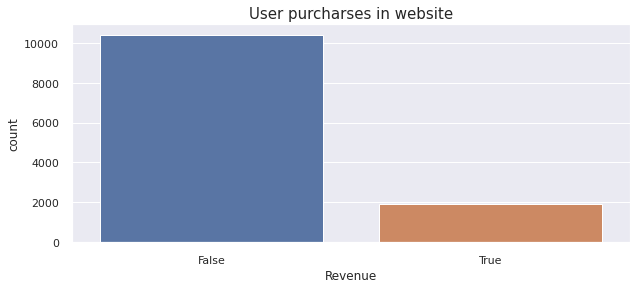

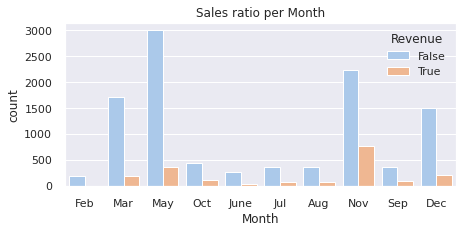

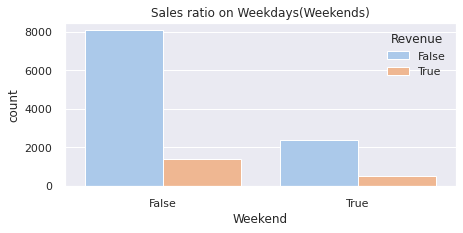

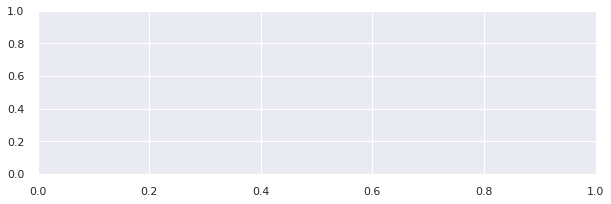

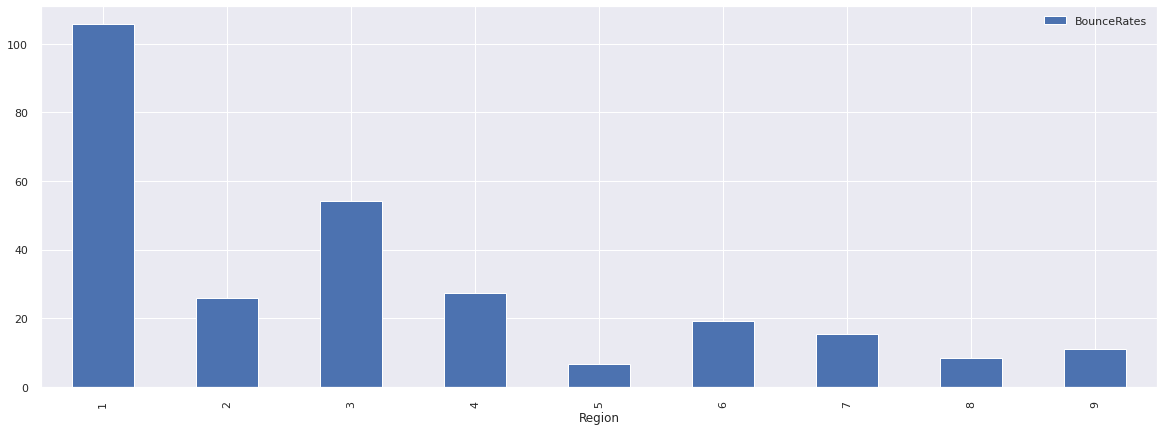

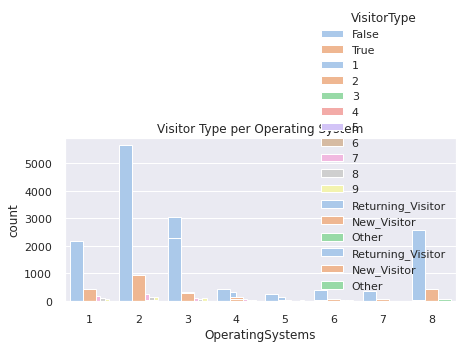

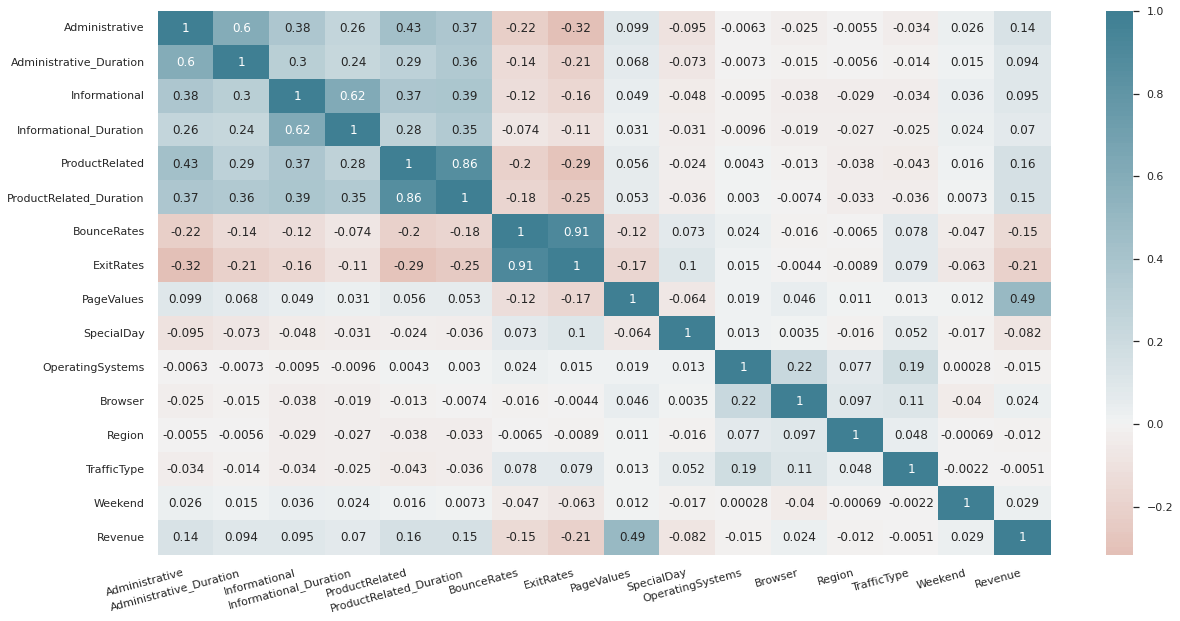

In [81]:
data_visualizations()

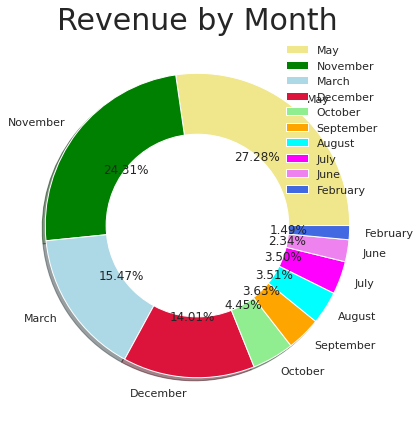

In [77]:
def donut():
  df = load_data()
  
  # df['VisitorType'].value_counts()
  # df['Month'].value_counts()
  # df.Month.unique()
# creating a donut chart for the months variations
# plotting a pie chart for share of special days
  size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
  colors = ['khaki', 'green', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'royalblue', 'lightblue', 'black']
  labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
  explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

  circle = plt.Circle((0, 0), 0.6, color = 'white')

  plt.rcParams['figure.figsize'] = (20, 7)

  plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
  plt.title('Revenue by Month', fontsize = 30)
  p = plt.gcf()
  p.gca().add_artist(circle)
  plt.axis('off')
  plt.legend()
  plt.show()
donut()

In [78]:
df[['SpecialDay','Month','Revenue']].groupby('Month').sum()

,SpecialDay,Revenue
Month,,
Aug,0.0,76
Dec,0.0,216
Feb,43.0,3
Jul,0.0,66
June,0.0,29
Mar,0.0,192
May,714.4,365
Nov,0.0,760
Oct,0.0,115


In [79]:
df[['BounceRates','Revenue']].groupby('BounceRates').mean()
# The bounce rate measure the percentage of visitors who enter the site then leave.

,Revenue
BounceRates,
0.000000,0.187749
0.000027,0.000000
0.000034,0.000000
0.000038,0.000000
0.000039,1.000000
...,...
0.175000,0.000000
0.176923,0.000000
0.180000,0.000000


# Data Preparation

In [6]:

df= load_data()
df.Revenue = df.Revenue.astype(int)
df.Weekend = df.Weekend.astype(int)
df.VisitorType = df.VisitorType.replace({'Returning_Visitor': '0', 
                                      'New_Visitor': '1', 
                                      'Other': '2'
                                      }).astype(int)
df.Month = df.Month.replace({'Jan': '1',
                          'Feb': '2', 
                            'Mar': '3', 
                            'Apr': '4',
                            'May': '5', 
                            'June': '6', 
                            'Jul': '7', 
                            'Aug': '8', 
                            'Sep': '9', 
                            'Oct': '10', 
                            'Nov': '11', 
                            'Dec': '12',
                          }).astype(int)
re={True:1,False:0}
df['Weekend']=df['Weekend'].map(re)
df['Revenue']=df['Revenue'].map(re)
df.describe(include = 'all').T
df.corr()



The largest sales can be seen on November, followed by May. There is no sales on February.

# Part  II:  Machine Learning Classifiers Pipeline

---

Split data

In [29]:

from imblearn.under_sampling import RandomUnderSampler

df = datapreparation()
# Divide X and y
y = df['Revenue']
X = df.drop(['Revenue'], axis=1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
# define sampling strategy
under = RandomUnderSampler(random_state=42)

# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)

   

# Classifiers

Defining Pipeline of algorithms

In [34]:
from sklearn.model_selection import cross_validate
# Defining Pipeline of algorithms
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
              ('normalizer', StandardScaler()), #Step1 - normalize data,

                ('clf', LogisticRegression()) #step2 - classifier
                  ])
#step2 - classifier

scores = cross_validate(pipeline, X_train, y_train)
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())


for classifier in clfs:
  pipeline.set_params(clf = classifier)
  scores = cross_validate(pipeline, X_train, y_train)
  print('---------------------------------')
  print(str(classifier))
  print('-----------------------------------')
  for key, values in scores.items():
          print(key,' mean ', values.mean())
          print(key,' std ', values.std())


---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.025432538986206055
fit_time  std  0.0013741917553646518
score_time  mean  0.004276132583618164
score_time  std  0.0003544614679895944
test_score  mean  0.8121392339781043
test_score  std  0.01673294979572004
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.21318306922912597
fit_time  std  0.023153207739975038
score_time  mean  0.05798163414001465
score_time  std  0.0038598618580993047
test_score  mean  0.8125008976309072
test_score  std  0.0087791186251832
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.19995107650756835
fit_time  std  0.0088883467960523
score_time  mean  0.0598660945892334
score_time  std  0.0037532478057601096
test_score  mean  0.8125008976309072
test_score  std  0.0087791186251832
---------------------------------
KNeighborsClassifier(n_neighbors=3)
--------------------

The pilene of classifers pointed  out that classifiers such as SVM and RandomForrest could be the best performing models.

# Modelling SVM

Modelling SVM

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Balance Accuracy of SVM classifier on test set: 0.80


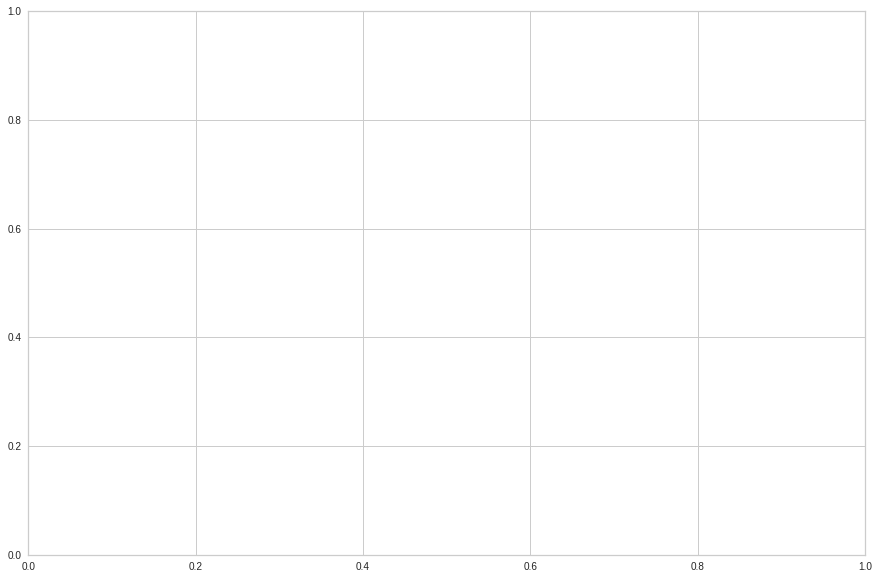

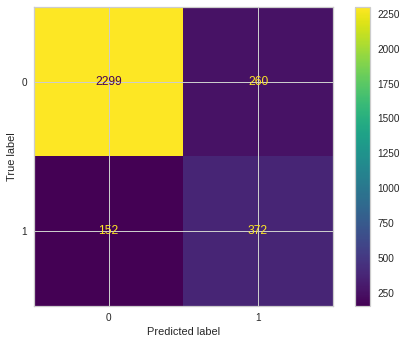

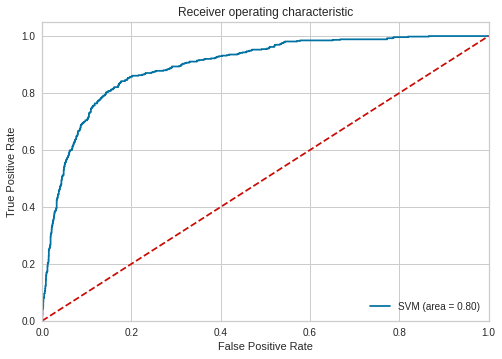

In [ ]:

fig, axs = plt.subplots(figsize=(15,10))
pipe = Pipeline([('scaler' , StandardScaler()), ('classifier' , SVC(probability=True))])

# Create param grid.
param_grid = [{'classifier__kernel' : ['linear'],# , 'rbf'
               'classifier__C' : [1, 10],
               'classifier__gamma' : [1e-1, 1e-2]}
              ]

# Create grid search object
clf = GridSearchCV(pipe, param_grid=param_grid,
                   cv=10,
                   verbose=True, n_jobs=-1)

# Fit on data
best_clf_svm = clf.fit(X_train, y_train)


# Results
y_pred_svc = best_clf_svm.predict(X_test)

y_prob_svc = best_clf_svm.predict_proba(X_test)[:, 1]
balance_svc= balanced_accuracy_score(y_test, y_pred_svc)
print('Balance Accuracy of SVM classifier on test set: {:.2f}'.
                format(balance_svc))

#Plot Confusion Matrix
plot_confusion_matrix(best_clf_svm,
                      X_test,
                      y_test,
                      values_format = '.0f') 




#Plot ROC Curve
svm_roc_auc = roc_auc_score(y_test, best_clf_svm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_clf_svm.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()


# Modelling RF

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Balance ACC 0.8470810252096328
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2559
           1       0.56      0.83      0.67       524

    accuracy                           0.86      3083
   macro avg       0.76      0.85      0.79      3083
weighted avg       0.89      0.86      0.87      3083



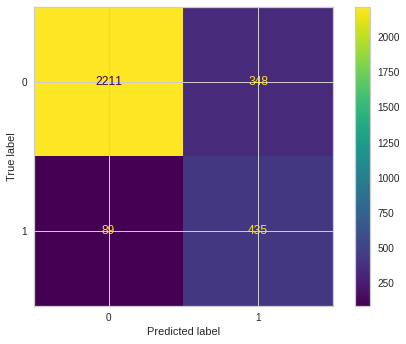

In [ ]:
pipe_rf = Pipeline([('scaler' , StandardScaler()), ('classifier' , RandomForestClassifier())])

# Create param grid.
param_grid = [{'classifier__n_estimators' : [10, 100, 500],
               'classifier__max_features' : ['sqrt', 'log2'],
               'classifier__max_depth' : [1, 2, 5, None],
               'classifier__max_samples' : [0.33, 0.66, 0.99]}
              ]
# Create grid search object
clf = GridSearchCV(pipe_rf, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)



#Plot Confusion Matrix
plot_confusion_matrix(best_clf_rf, X_test, y_test, values_format = '.0f') 

#ROAC
y_pred_rf = best_clf_rf.predict(X_test)
y_rf = best_clf_rf.predict_proba(X_test)[:, 1]
balanceacc_rf= balanced_accuracy_score(y_test, y_pred_rf)
print('Balance ACC {}'.format(balanceacc_rf))
print(classification_report(y_test, y_pred_rf))



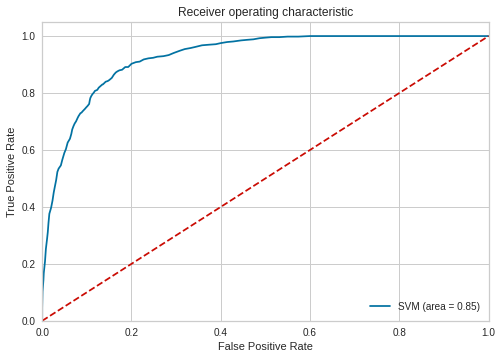

In [ ]:

#Plot ROC Curve
rf_roc_auc = roc_auc_score(y_test, best_clf_rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_clf_rf.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

Generating RF feature importance scores

In [ ]:
nreps = 50
nest_range =range(10,110,10)
oob_res_dict = {}
ho_res_dict ={}
for nest in nest_range:
    oob_accs = []
    ho_accs = []
    for r in range(nreps):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        RFoob = RandomForestClassifier(n_estimators = nest, oob_score = True)
        RFoob.fit(X_train,y_train)
        oob_est = RFoob.oob_score_
        oob_accs.append(oob_est)
        y_pred = RFoob.predict(X_test)
        ho_est = accuracy_score(y_pred,y_test)
        ho_accs.append(ho_est)
    print(mean(oob_accs), mean(ho_accs))
    oob_res_dict[nest]=mean(oob_accs)
    ho_res_dict[nest]=mean(ho_accs)

0.8808594601137877 0.8945834357335954
0.8919477060888512 0.8977242565740968
0.8951022878586128 0.8993905136397149
0.8966493160634306 0.9004767756205456
0.8978525602227333 0.9005898255099534
0.899256748577654 0.8998918653231752
0.8987943348262922 0.9022609977881544
0.8996780050841302 0.9015482919636274
0.9003849412904007 0.9018726959941017
0.9004963079530324 0.9024821823543868


Generalisation Accuracy
Comparing the RF OOB generalisation accuracy estimates with that estimated using hold-out.
The OOB estimate gets better as more ensemble members are used.
Repeating 50 times.

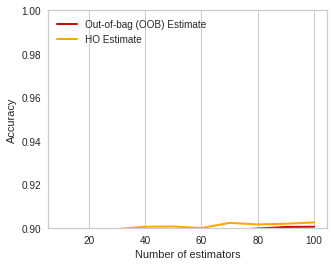

In [ ]:
fig = plt.figure(figsize=(5,4))

plt.plot(nest_range, list(oob_res_dict.values()), lw = 2, color = 'r', 
         label = 'Out-of-bag (OOB) Estimate')
plt.plot(nest_range, list(ho_res_dict.values()), lw = 2, color = 'orange', 
         label = 'HO Estimate')

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.ylim([0.9,1])
plt.legend(loc = 'upper left')
plt.grid(axis = 'y')
fig.savefig('OOB-acc.pdf')

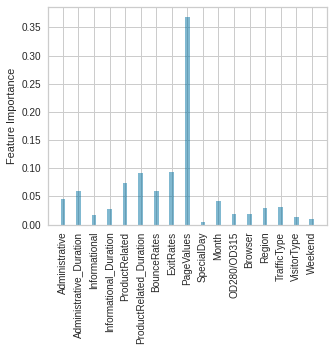

In [ ]:
RFoob = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state=0)
RFoob.fit(X_train,y_train)
RFoob.feature_importances_


names = list(X.columns)
names[11] = 'OD280/OD315'
y_pos = np.arange(len(names))
f = plt.figure(figsize=(5,4))
plt.bar(y_pos, RFoob.feature_importances_, align='center', width = 0.3, alpha=0.5, 
        label = "Feature")
plt.xticks(y_pos, names, rotation=90)
plt.ylabel('Feature Importance')
f.savefig('RF-FI.pdf',bbox_inches='tight')

#  Part III: Cluster Analysis

---



---



Dimensionality Reduction and Manifold Learning

In [ ]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance



X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X.shape, X_pca.shape)

(12330, 17) (12330, 2)


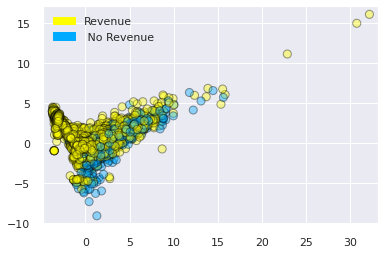

In [ ]:
plot_labelled_scatter(X_pca, y, ['Revenue', ' No Revenue'])


In [ ]:
Counter(y)

Counter({0: 10422, 1: 1908})

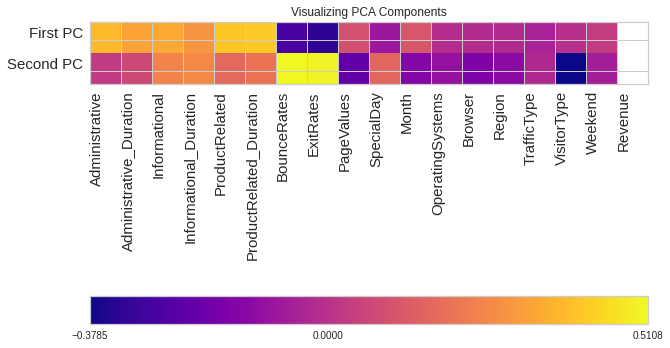

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(df.columns)




plt.title('Visualizing PCA Components')
plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.1, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=15);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=15);
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

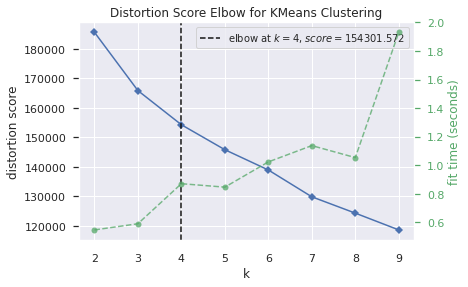

In [ ]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(X_normalized)       
distortion_visualizer.show()       

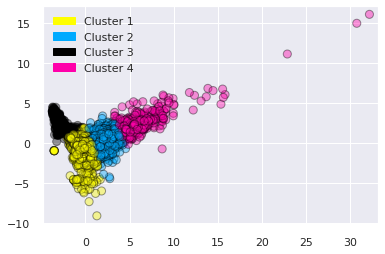

In [ ]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(X_pca)

plot_labelled_scatter(X_pca, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df['Clusters'] = predictions
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,...,TrafficType,VisitorType,Weekend,Revenue,Clusters
0,0,0.0,0,0.0,1,...,1,0,0,0,2
1,0,0.0,0,0.0,2,...,2,0,0,0,0
2,0,0.0,0,0.0,1,...,3,0,0,0,2
3,0,0.0,0,0.0,2,...,4,0,0,0,2
4,0,0.0,0,0.0,10,...,4,0,1,0,0


In [ ]:
df.groupby('Clusters')['Revenue'].count()

Clusters
0    8250
1    2481
2    1197
3     402
Name: Revenue, dtype: int64

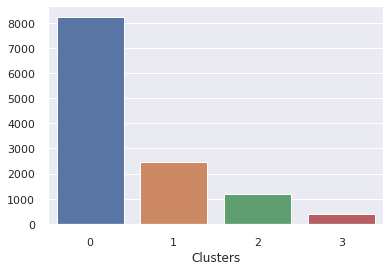

In [ ]:
result = df.groupby(['Clusters']).size()
 
# plot the result
sns.barplot(x = result.index, y = result.values)

# Part IV : Clustering as Pre- Classification Step

---





Defining optimal number of clusters

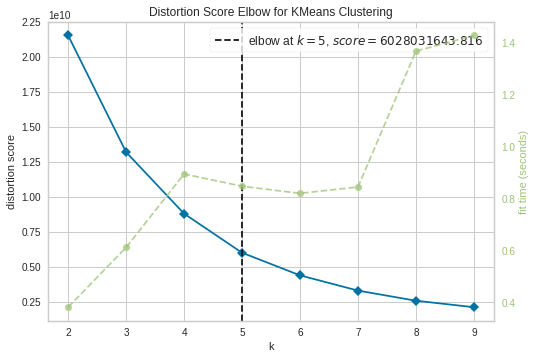

In [ ]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(df)       
distortion_visualizer.show()       

Applying K-means

The goal is to apply k-means clustering to training data to find clusters and predicts them for the test set

In [ ]:
clustering = KMeans(n_clusters=4, random_state=4).fit(df)
# apply the labels
train_labels = clustering.labels_
X_train_clstrs = df.copy()                                                 

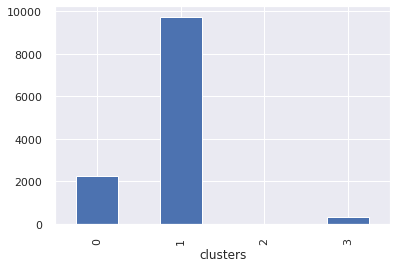

In [ ]:
train_labels
X_train_clstrs['clusters'] = train_labels
X_train_clstrs.groupby(['clusters']).size().plot(kind = "bar")

In [ ]:
X_train_clstrs.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Divide the df by cluster

In [ ]:
df_cluster_0 = X_train_clstrs[X_train_clstrs['clusters']== 0]
df_cluster_1 = X_train_clstrs[X_train_clstrs['clusters']== 1]
df_cluster_2 = X_train_clstrs[X_train_clstrs['clusters']== 2]
df_cluster_3 = X_train_clstrs[X_train_clstrs['clusters']== 3]
df_cluster_4 = X_train_clstrs[X_train_clstrs['clusters']== 4]

In [ ]:
print('Cluster 0 Dataset', (df_cluster_0.shape))
print('Cluster 1 Dataset',(df_cluster_1.shape))
print('Cluster 2 Dataset',(df_cluster_2.shape))
print('Cluster 3 Dataset',(df_cluster_3.shape))


Cluster 0 Dataset (2237, 20)
Cluster 1 Dataset (9747, 20)
Cluster 2 Dataset (10, 20)
Cluster 3 Dataset (336, 20)


# Performing Supervised Classification Algorithms on Clusters Datasets

---



---



Cluster 0

In [ ]:
# Divide X and y
y_c0 = df_cluster_0['Revenue']
X_c0 = df_cluster_0.drop(['Revenue'], axis=1)
y_00 = df_cluster_0['Revenue']
# Split dataset


# Split dataset
X_train_c0,X_test_c0, y_train_c0, y_test_c0 = train_test_split(X_c0, y_00, train_size=0.7, test_size=0.3, random_state=42)





In [ ]:
# # # define sampling strategy
# under = RandomUnderSampler(random_state=42)

# # # fit and apply the transform
# y_train_c0 = under.fit_resample(X_train_c0, y_train_c0)

Pipeline of classifiers

In [ ]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data,

    ('clf', LogisticRegression()) #step2 - classifier
])

# CLS Cluster Zero

In [ ]:
boxplot_fold_scores = []
bal_acc_scores = []

In [ ]:
def clusters_classification():
  scores = cross_validate(pipeline, X_train_c0, y_train_c0)
  clfs = []
  clfs.append(LogisticRegression())
  clfs.append(SVC())
  clfs.append(SVC())
  clfs.append(KNeighborsClassifier(n_neighbors=3))
  clfs.append(DecisionTreeClassifier())
  clfs.append(RandomForestClassifier())


  for classifier in clfs:
      pipeline.set_params(clf = classifier)
      scores = cross_validate(pipeline, X_train_c0, y_train_c0)
      print('---------------------------------')
      print(str(classifier))
      print('-----------------------------------')
      for key, values in scores.items():
              print(key,' mean ', values.mean())
              print(key,' std ', values.std())

cluster_0  =  clusters_classification()


---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.02391204833984375
fit_time  std  0.007883516766527114
score_time  mean  0.003979206085205078
score_time  std  9.080487013926321e-05
test_score  mean  0.7955271565495208
test_score  std  0.007825845823588421
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.0774141788482666
fit_time  std  0.019651909064367073
score_time  mean  0.020394563674926758
score_time  std  0.000745730813515356
test_score  mean  0.7955271565495208
test_score  std  0.014570931950148728
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.07084307670593262
fit_time  std  0.0040094736253549965
score_time  mean  0.02071990966796875
score_time  std  0.002374135787295264
test_score  mean  0.7955271565495208
test_score  std  0.014570931950148728
---------------------------------
KNeighborsClassifier(n_neighbors=3)
---------------

Random Forrest Classifer Achieve the Best Perfomance

---



---



In [ ]:
def RandonForest_scores(X_train_c0, X_test_c0, y_train_c0, y_test_c0):
    '''Random Forest'''
     # fit and apply the transform
    X_train_c0, y_train_c0 = under.fit_resample(X_train_c0, y_train_c0)
    rf=  RandomForestClassifier(max_depth=2, random_state=0)
    rf.fit(X_train_c0, y_train_c0)
    rf.score(X_test_c0, y_test_c0)
    y_pred_rf = rf.predict(X_test_c0)

    plot_confusion_matrix(rf, X_test_c0, y_test_c0, values_format = '.0f') 

    y_prob_rf = rf.predict_proba(X_test_c0)[:, 1]

    bal_acc__rf= balanced_accuracy_score(y_test_c0,y_pred_rf)
 
    print('Accuracy of Random Forrest classifier on test set: {:.2f}'.
                format(bal_acc__rf))
    print(classification_report(y_test_c0, y_pred_rf))
   
    return rf, y_pred_rf, y_prob_rf, bal_acc__rf

Accuracy of Random Forrest classifier on test set: 0.76
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       512
           1       0.48      0.77      0.59       160

    accuracy                           0.75       672
   macro avg       0.70      0.76      0.71       672
weighted avg       0.81      0.75      0.76       672



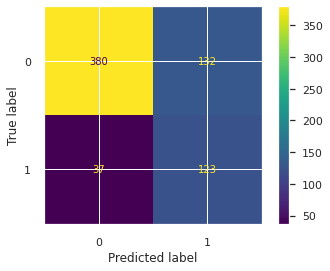

In [ ]:
rf, y_pred_untuned_rf, y_prob_rf, bal_acc__rf = RandonForest_scores(X_train_c0,
                                                                            X_test_c0,
                                                                            y_train_c0,
                                                                            y_test_c0)
bal_acc_scores.append(('RF - Cluster Zero', bal_acc__rf))

#CLS Cluster One 

In [ ]:
# Divide X and y
y_c1 = df_cluster_1['Revenue']
X_c1 = df_cluster_1.drop(['Revenue'], axis=1)

# Split dataset
X_train_c1, X_test_c1, y_train_c1, y_test_c1 = train_test_split(X_c1, y_c1, train_size=0.8, test_size=0.2, random_state=42)




In [ ]:
def clusters_classification1():
  scores = cross_validate(pipeline, X_train_c1, y_train_c1)
  clfs = []
  clfs.append(LogisticRegression())
  clfs.append(SVC())
  clfs.append(SVC())
  clfs.append(KNeighborsClassifier(n_neighbors=3))
  clfs.append(DecisionTreeClassifier())
  clfs.append(RandomForestClassifier())


  for classifier in clfs:
      pipeline.set_params(clf = classifier)
      scores = cross_validate(pipeline, X_train_c1, y_train_c1)
      print('---------------------------------')
      print(str(classifier))
      print('-----------------------------------')
      for key, values in scores.items():
              print(key,' mean ', values.mean())
              print(key,' std ', values.std())


cluster_1  =  clusters_classification1()

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.04279899597167969
fit_time  std  0.004012991444874206
score_time  mean  0.0041389942169189455
score_time  std  2.4049994813710697e-05
test_score  mean  0.9147111889607078
test_score  std  0.004187191507506118
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.7694127559661865
fit_time  std  0.018150206042574182
score_time  mean  0.18256406784057616
score_time  std  0.0063534892468912595
test_score  mean  0.9220206904491703
test_score  std  0.0020744017791623957
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.7712499618530273
fit_time  std  0.023436878777490917
score_time  mean  0.1844191074371338
score_time  std  0.006702411475670869
test_score  mean  0.9220206904491703
test_score  std  0.0020744017791623957
---------------------------------
KNeighborsClassifier(n_neighbors=3)
--------------

Random Forrest Classifer Achieve the Best Perfomance

---



---



In [ ]:
def RandonForest_scores(X_train_c1, X_test_c1, y_train_c1, y_test_c1):
    '''Random Forest'''

    # fit and apply the transform
    X_train_c1, y_train_c1 = under.fit_resample(X_train_c1, y_train_c1)
    rf=  RandomForestClassifier(max_depth=2, random_state=0)
    rf.fit(X_train_c1, y_train_c1)
    rf.score(X_test_c1, y_test_c1)
    y_pred_rf = rf.predict(X_test_c1)

    plot_confusion_matrix(rf, X_test_c1, y_test_c1, values_format = '.0f') 

    y_prob_rf = rf.predict_proba(X_test_c1)[:, 1]

    bal_acc__rf= balanced_accuracy_score(y_test_c1,y_pred_rf)
 
    print('Accuracy of Random Forrest classifier on test set: {:.2f}'.
                format(bal_acc__rf))
    print(classification_report(y_test_c1, y_pred_rf))
   
    return rf, y_pred_rf, y_prob_rf, bal_acc__rf

Accuracy of Random Forrest classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1675
           1       0.58      0.82      0.68       275

    accuracy                           0.89      1950
   macro avg       0.78      0.86      0.81      1950
weighted avg       0.91      0.89      0.90      1950



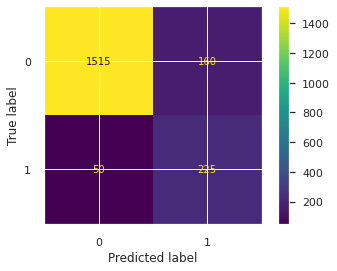

In [ ]:
rf, y_pred_untuned_rf, y_prob_rf, bal_acc__rf = RandonForest_scores(X_train_c1,
                                                                            X_test_c1,
                                                                            y_train_c1,
                                                                            y_test_c1)
bal_acc_scores.append(('RF - Cluster One', bal_acc__rf))

# CLS Cluster Two

In [ ]:
# Divide X and y
y_c2 = df_cluster_2['Revenue']
X_c2 = df_cluster_2.drop(['Revenue'], axis=1)

# Split dataset
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(X_c2, y_c2, train_size=0.8, test_size=0.2, random_state=42)


def clusters_classification2():
  scores = cross_validate(pipeline, X_train_c2, y_train_c2)
  clfs = []
  clfs.append(LogisticRegression())
  clfs.append(SVC())
  clfs.append(SVC())
  clfs.append(KNeighborsClassifier(n_neighbors=3))
  clfs.append(DecisionTreeClassifier())
  clfs.append(RandomForestClassifier())


  for classifier in clfs:
      pipeline.set_params(clf = classifier)
      scores = cross_validate(pipeline, X_train_c2, y_train_c2)
      print('---------------------------------')
      print(str(classifier))
      print('-----------------------------------')
      for key, values in scores.items():
              print(key,' mean ', values.mean())
              print(key,' std ', values.std())


cluster_2  =  clusters_classification2()


---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.006600379943847656
fit_time  std  0.000998374410879731
score_time  mean  0.0017548561096191405
score_time  std  0.0008794392731318707
test_score  mean  nan
test_score  std  nan
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.005102682113647461
fit_time  std  0.000257447839400361
score_time  mean  0.0018923759460449218
score_time  std  0.0009542568263607415
test_score  mean  nan
test_score  std  nan
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.005697441101074219
fit_time  std  0.001121023201026518
score_time  mean  0.002239227294921875
score_time  std  0.001411498066873609
test_score  mean  nan
test_score  std  nan
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
fit_time  mean  0.006416988372802734
fit_time  std  0.00172088101534

In [ ]:
def RandonForest_scores(X_train_c2, X_test_c2, y_train_c2, y_test_c2):
    '''Random Forest'''
     # fit and apply the transform
    X_train_c2, y_train_c2 = under.fit_resample(X_train_c2, y_train_c2)
    rf=  RandomForestClassifier(max_depth=2, random_state=0)
    rf.fit(X_train_c2, y_train_c2)
    rf.score(X_test_c2, y_test_c2)
    y_pred_rf = rf.predict(X_test_c2)

    plot_confusion_matrix(rf, X_test_c2, y_test_c2, values_format = '.0f') 

    y_prob_rf = rf.predict_proba(X_test_c2)[:, 1]

    bal_acc__rf= balanced_accuracy_score(y_test_c2,y_pred_rf)
 
    print('Accuracy of Random Forrest classifier on test set: {:.2f}'.
                format(bal_acc__rf))
    print(classification_report(y_test_c2, y_pred_rf))
   
    return rf, y_pred_rf, y_prob_rf, bal_acc__rf

Accuracy of Random Forrest classifier on test set: 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



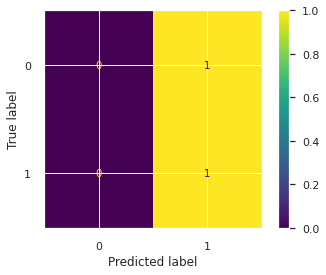

In [ ]:
rf, y_pred_untuned_rf, y_prob_rf, bal_acc__rf = RandonForest_scores(X_train_c2,
                                                                            X_test_c2,
                                                                            y_train_c2,
                                                                            y_test_c2)
bal_acc_scores.append(('RF - Cluster Two', bal_acc__rf))

# CLS Custer Three

In [ ]:
# Divide X and y
y_c3 = df_cluster_3['Revenue']
X_c3 = df_cluster_3.drop(['Revenue'], axis=1)

# Split dataset
X_train_c3, X_test_c3, y_train_c3, y_test_c3 = train_test_split(X_c3, y_c3, train_size=0.8, test_size=0.2, random_state=42)


def clusters_classification3():
  scores = cross_validate(pipeline, X_train_c3, y_train_c3)
  clfs = []
  clfs.append(LogisticRegression())
  clfs.append(SVC())
  clfs.append(SVC())
  clfs.append(KNeighborsClassifier(n_neighbors=3))
  clfs.append(DecisionTreeClassifier())
  clfs.append(RandomForestClassifier())


  for classifier in clfs:
      pipeline.set_params(clf = classifier)
      scores = cross_validate(pipeline, X_train_c3, y_train_c3)
      print('---------------------------------')
      print(str(classifier))
      print('-----------------------------------')
      for key, values in scores.items():
              print(key,' mean ', values.mean())
              print(key,' std ', values.std())


cluster_3  =  clusters_classification3()

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.009026050567626953
fit_time  std  0.0004649012881103395
score_time  mean  0.0022096633911132812
score_time  std  0.00013144377586356997
test_score  mean  0.6715583508036338
test_score  std  0.016476262527900402
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.0074918270111083984
fit_time  std  0.00019964027804772756
score_time  mean  0.0029592037200927733
score_time  std  7.415506202167828e-05
test_score  mean  0.697624039133473
test_score  std  0.031016234405414306
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.008281373977661132
fit_time  std  0.001801981693736772
score_time  mean  0.0029053688049316406
score_time  std  4.899510501937379e-05
test_score  mean  0.697624039133473
test_score  std  0.031016234405414306
---------------------------------
KNeighborsClassifier(n_neighbors=3)
---

In [ ]:
def RandonForest_scores(X_train_c3, X_test_c3, y_train_c3, y_test_c3):
    '''Random Forest'''
     # fit and apply the transform
    X_train_c3, y_train_c3 = under.fit_resample(X_train_c3, y_train_c3)
    rf=  RandomForestClassifier(max_depth=2, random_state=0)
    rf.fit(X_train_c3, y_train_c3)
    rf.score(X_test_c3, y_test_c3)
    y_pred_rf = rf.predict(X_test_c3)

    plot_confusion_matrix(rf, X_test_c3, y_test_c3, values_format = '.0f') 

    y_prob_rf = rf.predict_proba(X_test_c3)[:, 1]

    bal_acc__rf= balanced_accuracy_score(y_test_c3,y_pred_rf)
 
    print('Accuracy of Random Forrest classifier on test set: {:.2f}'.
                format(bal_acc__rf))
    print(classification_report(y_test_c3, y_pred_rf))
   
    return rf, y_pred_rf, y_prob_rf, bal_acc__rf

Accuracy of Random Forrest classifier on test set: 0.68
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        45
           1       0.54      0.65      0.59        23

    accuracy                           0.69        68
   macro avg       0.67      0.68      0.67        68
weighted avg       0.71      0.69      0.70        68



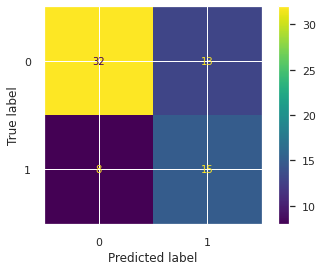

In [ ]:
rf, y_pred_untuned_rf, y_prob_rf, bal_acc__rf = RandonForest_scores(X_train_c3,
                                                                            X_test_c3,
                                                                            y_train_c3,
                                                                            y_test_c3)
bal_acc_scores.append(('RF - Cluster Three', bal_acc__rf))

# Comparison of Cross-validation Accuracy for cluster 0-4

In [ ]:
boxplot_fold_scores

[]

In [ ]:
plt.rcParams["figure.figsize"] = (20,12)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison of Average Cross-Validation Accuracy per Learning Algorithm')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.show()

[]